In [22]:
import os,re
HostName=os.uname()[1]
print (HostName)

import vresult_data_com as vrc
import vresult_data_reward as vdr
import config as sc
#system_name="Sell300"
system_name="Buy300"
process_name="EvalAgent_0"
Lstock, LEvalT, LYM, lgc=vrc.get_addon_setting(system_name,process_name)
i0=vdr.ana_reward(system_name, process_name,Lstock, LEvalT, LYM,lgc)
process_name="EvalAgent_2"
i1=vdr.ana_reward(system_name, process_name,Lstock, LEvalT, LYM,lgc)

homeserver
preparing  EvalAgent_0 Eval Process All 2500
can not find /home/rdchujf/n_workspace/RL/Buy300/EvalAgent_0/SH601816/log_a_r_e_T2500.csv
preparing  EvalAgent_2 Eval Process All 2500
can not find /home/rdchujf/n_workspace/RL/Buy300/EvalAgent_2/SH600893/log_a_r_e_T2500.csv


[========================================================================] 100%
[========================================================================] 100%


In [ ]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)
fig=plt.figure()
i0.show_reward(fig, 250,[],[])
plt.show()

In [ ]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)
fig=plt.figure()
i1.show_reward(fig, 250,[],[])
plt.show()

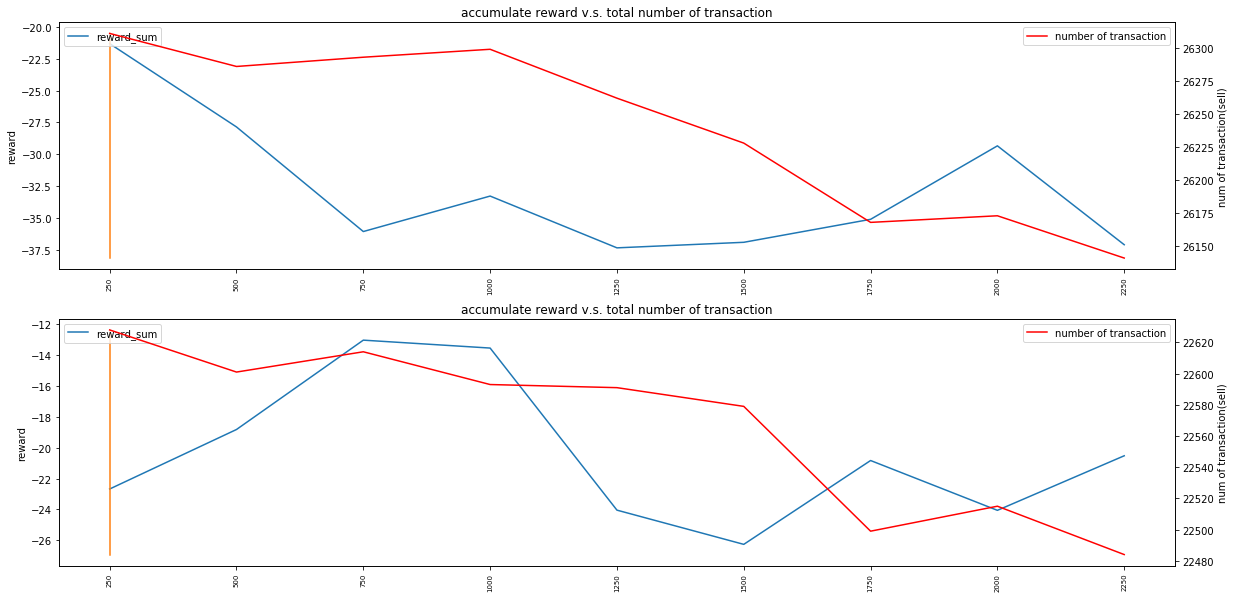

In [23]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)
fig=plt.figure()
fig.add_subplot(211)
fig.add_subplot(212)
allaxes = fig.get_axes()
i0.plot_reward_count(allaxes[0], 250)
i1.plot_reward_count(allaxes[1], 250)
plt.show()


In [15]:
#try
print(LEvalT)

[250, 500, 750, 1000, 1250, 1500, 1750, 2000, 2250, 2500, 2750, 3000, 3250, 3500, 3750, 4000, 4250, 4500, 4750, 5000, 5250, 5500, 5750, 6000, 6250, 6500, 6750, 7000, 7250, 7500, 7750]
